In [2]:
# import the env_network from multi_user_network_env.py
from multi_user_network_env import env_network
import numpy as np
import matplotlib.pyplot as plt

In [3]:
NUM_USERS = 3
NUM_CHANNELS = 2
ATTEMPT_PROB = 1

In [4]:
#initializing the environment
env = env_network(NUM_USERS,NUM_CHANNELS,ATTEMPT_PROB)


In [43]:
# To sample random  actions from action_space
action = env.sample()
print action

[2 0 1]


# How to take actions
Here action = ``` [1 2 0] ``` means 1st channel will be accessed by user 1, 2nd channel will be accessed by user 2 and user 3 will not take any action. 
Since we have just sampled the actions uniformly for each user, now we have to take these actions .For that
use ```env.step()``` function and pass these actions

In [45]:
obs = env.step(action)
print obs

[(1, 1.0), (0, 0.0), (1, 1.0), array([0, 0], dtype=int32)]


## Observation Format

For ```action = [1,2,0]``` obs is ```[(1, 1.0), (1, 1.0), (0, 0.0), array([0, 0], dtype=int32)]```

The format  of obs is ```[(ACK1,REWARD1),(ACK2,REWARD2),(ACK3,REWARD3), ...,(ACKn,REWARDn) , (CAP_CHANNEL1,CAP_CHANNEL2,...,CAP_CHANNEL_k)]```.

When we pass actions to the evironment , it takes these actions and returns the immediate reward as well as acknowledgement of the channel.Finally it also returns the residual capacity of the channel(remaining capacity).


Here 1,2,3 represents user 1, user 2 and user 3 respectively for the first n tuples where n is number of users and k is number of channels.
Last element is an array  ```[CAP_CHANNEL1, CAP_CHANNEL2, CAP_CHANNEL_k]``` denotes the remaining channel capacity or the fact that channel is available or not.

Since both channels were available at the beginning , user 1 and 2 allocates channel 1 and 2 respectively and user 3 remains idle. This can be concluded by the resulting output where there is (ACK, REWARD) pair as ```(1 , 1.0)``` for user 1 and 2 and is ```(0 , 0.0)``` for user 3. 
Both the channels are allocated by user 1 and 2 therefore last element is ```array([0,0])```.



In [11]:
# user 1 and 2 takes action 1 and user 3 takes action 2 
action = np.array([1,1,2])
obs = env.step(action)
print obs


[(0, 0.0), (0, 0.0), (1, 1.0), array([1, 0], dtype=int32)]


We can also take our own actions.But first make sure to convert it to numpy array

In [35]:
# to take reward from obs
rewards = [i[1] for i in obs[:NUM_USERS]]
print rewards

[1.0, 1.0, 0.0]


In [38]:
TIME_SLOTS = 5
total_rewards = []
for i in range(TIME_SLOTS):
    action = env.sample()
    print action
    obs = env.step(action)
    print obs
    rewards = [i[1] for i in obs[:NUM_USERS]]
    reward_sum = np.sum(rewards)
    print reward_sum
    total_rewards.append(reward_sum)
    print "***************"

[1 1 1]
[(0, 0.0), (0, 0.0), (0, 0.0), array([1, 1], dtype=int32)]
0.0
***************
[1 1 0]
[(0, 0.0), (0, 0.0), (0, 0.0), array([1, 1], dtype=int32)]
0.0
***************
[2 2 0]
[(0, 0.0), (0, 0.0), (0, 0.0), array([1, 1], dtype=int32)]
0.0
***************
[1 1 2]
[(0, 0.0), (0, 0.0), (1, 1.0), array([1, 0], dtype=int32)]
1.0
***************
[2 2 0]
[(0, 0.0), (0, 0.0), (0, 0.0), array([1, 1], dtype=int32)]
0.0
***************


In [50]:
#Lets take the action for 50 more time slots
TIME_SLOTS = 50
total_rewards = []
for i in range(TIME_SLOTS):
    action = env.sample()
    #print action
    obs = env.step(action)
    #print obs
    rewards = [i[1] for i in obs[:NUM_USERS]]
    reward_sum = np.sum(rewards)
    #print reward_sum
    total_rewards.append(reward_sum)
    #print "***************"

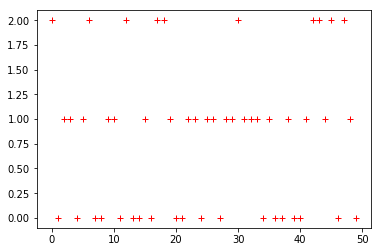

In [51]:
plt.plot(np.arange(TIME_SLOTS), total_rewards,'r+')
plt.show()

The graph shows total reward generated per time_slot for 50 slots.

Here reward ```0.0``` means no user was able to send the packet and both the channels were free while reward ```2.0``` means both the channels were being used without collision and any one user was not sending the packets.  